<a href="https://colab.research.google.com/github/novouss/fake-news-detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Get Repository
!git clone https://github.com/novouss/fake-news-detection.git

fatal: destination path 'fake-news-detection' already exists and is not an empty directory.


In [ ]:
!ls

fake-news-detection  sample_data


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
false_dataset = pd.read_csv('//content//fake-news-detection//datasets//fake.csv')
true_dataset = pd.read_csv('//content//fake-news-detection//datasets//true.csv')

false_dataset.head() # Checks first five rows of fake.csv
true_dataset.head() # Check first five rows of true.csv

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


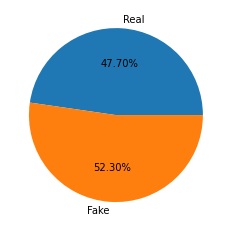

In [ ]:
d = [len(true_dataset), len(false_dataset)]
t = ['Real', 'Fake']

plt.pie(d, labels = t, autopct = '%1.2f%%')
plt.show()

In [ ]:
false_dataset['fake'] = 0
true_dataset['fake'] = 1

table = pd.DataFrame()
table = true_dataset.append(false_dataset) # Merge the two tables
table = table.drop(columns=['subject','date']) # Remove unnecessary features

In [ ]:
print(table.shape)

(44898, 3)


In [ ]:
input_arr = np.array(table['title'])

In [ ]:
import re
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 40000):
  arr = re.sub('[^a-zA-Z]', ' ', input_arr[i])
  arr = arr.lower()
  arr = arr.split()

  ps = PorterStemmer()

  arr = [ps.stem(word) for word in arr if not word in set(stopwords.words('english'))] 

  arr = ' '.join(arr)

  corpus.append(arr)

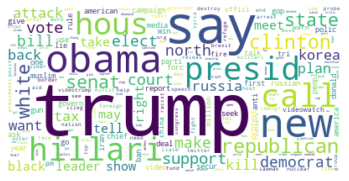

In [ ]:
from wordcloud import WordCloud

text = ""
for word in corpus:
  text += " ".join(word.split(' '))

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(max_features = 5000)

X = countv.fit_transform(corpus).toarray()
y = table.iloc[0:40000, 2].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
print('Classification report \n', classification_report(y_test, y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Cohen Kappa:', cohen_kappa_score(y_test, y_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      3752
           1       0.94      0.97      0.95      4248

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000

Confusion Matrix
 [[3488  264]
 [ 140 4108]]
Precision: 0.939615736505032
Accuracy: 0.9495
Cohen Kappa: 0.8984142566035762


<class 'numpy.ndarray'>
